In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<div class='alert alert-info'>
  Calculamos todas las posibles rectas entre los distintos puntos, y sacamos el promedio de sus respectivas pendientes y puntos de corte.  
</div>

In [14]:
def convination(n):
    con = []
    for i in range(0, n - 1):
        for j in range(i, n):
            if (i != j):
                con.append([i, j])
    return con

convination(4)

[[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]

In [15]:
def lines(x, y, index):
    cutPoints = []
    slopes = []
    for n in index:
        x1 = x[n[0]]
        x2 = x[n[1]]
        y1 = y[n[0]]
        y2 = y[n[1]]
        # slope
        m = (y2 - y1) / (x2 - x1)
        # cut point
        b = y1 - m*x1
        slopes.append(m)
        cutPoints.append(b)
    
    return [slopes, cutPoints]
    

In [58]:
y = [270, 380, 450, 480]
x = [80, 120, 150, 170]

index = convination(len(x))
print(index)

lisLines = lines(x, y, index)
print(lisLines)

[[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]
[[2.75, 2.5714285714285716, 2.3333333333333335, 2.3333333333333335, 2.0, 1.5], [50.0, 64.28571428571428, 83.33333333333331, 100.0, 140.0, 225.0]]


In [67]:
m = np.mean(lisLines[0])
b = np.mean(lisLines[1])

X = np.linspace(min(x), max(x), 100)
Y = m*X + b
print(m)
print(b)
Z = 2.37*X + 86.96

2.248015873015873
110.43650793650794


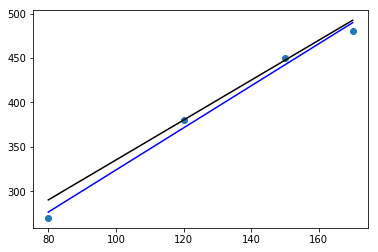

In [68]:

plt.plot(x, y, 'o')
plt.plot(X, Y, 'k')
plt.plot(X, Z, 'b')

plt.show()
    

In [69]:
num = 0
dem = 0
xm = np.mean(x)
ym = np.mean(y)

for i in range(len(x)):
    n = ( (x[i] - xm) * (y[i] - ym) )
    d = ( (x[i] - xm)**2 )
    num += n
    dem += d
    
beta = num / dem
alpha = ym - beta*xm

print(beta, alpha)

2.369565217391304 86.95652173913044


In [75]:
punto = 100
regresion = 86.96 + 2.37*punto
ruben = b + m*punto

print(regresion)
print(ruben)

323.96
335.23809523809524


### Como vemos es mejor la regresion lineal jajajajja  :(

<div class='alert alert-info'>
  <h3>Modelos de Regresión lineal</h3>  
</div>

In [6]:
x = 1.5 + 2.5*np.random.randn(100);
err = 0.8*np.random.randn(100);
y_pred = 5 + 1.9*x;
y_act = 5 + 1.9*x + err;

x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

data = pd.DataFrame(
    {
        "x": x_list,
        "y": y_act_list,
        "y_pred": y_pred_list
    }
)

data.head()

,x,y,y_pred
0,2.032173,10.033648,8.861129
1,3.893630,11.205351,12.397898
2,1.722249,8.832837,8.272273
3,0.552378,8.159509,6.049519
4,2.733668,10.546640,10.193968


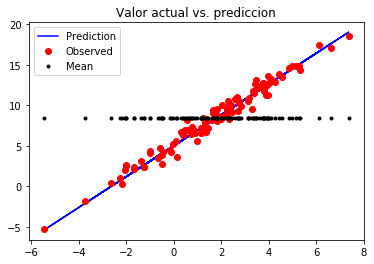

In [15]:
y_mean = [np.mean(y_act) for i in range(len(x_list))]
plt.plot(x, y_pred, 'b', label='Prediction')
plt.plot(x, y_act, 'ro', label='Observed')
plt.plot(x, y_mean, 'k.', label='Mean')
plt.legend(loc=0)
plt.title('Valor actual vs. prediccion')
plt.show()

In [37]:
# sum square total
data['SST'] = (data['y_pred'] - np.mean(y_act))**2
# sum square differece
data['SSD'] = (data['y_pred'] - data['y'])**2
# sum square regretion
data['SSR'] = (data['y'] - np.mean(y_act))**2

In [36]:
ssr = sum(data['SSR'])
ssd = sum(data['SSD'])
sst = sum(data['SST'])

# sst = ssr + ssd
R2 = ssr/sst  # Cuadrado medio
R2

0.9681891437421056

### El numero R2 es un indicador de que tan buena es nuestra regresión.

<div class='alert alert-info'>
  <h3>Obteniendo la recta de regresión</h3>
   <ul>
       <li>y = <b>a</b> + <b>b</b>*x</li>
       <li><b>b</b> = sum((xi - xm) * (yi - ym)) / sum((xi - xm)**2)</li>
       <li><b>a</b> = ym - b*xm</li>
   </ul>
</div>

In [38]:
def coefRegretion(x, y):
    """
    We obtain the coefficients of the linear regression.
    y = a = b*x
    """
    xm = np.mean(x)
    ym = np.mean(y)
    num = 0
    den = 0
    for i in range(len(x)):
        num += (x[i] - xm) * (y[i] - ym)
        den += (x[i] - xm)**2
        
    b = num / den
    a = ym - b*xm
    return([a,b])
    

In [40]:
coeff = coefRegretion(data['x'], data['y'])
coeff

[5.277247146047397, 1.844930819138838]

In [46]:
xx = np.linspace(min(data['x']), max(data['x']), 100)
yy = coeff[0] + coeff[1]*xx

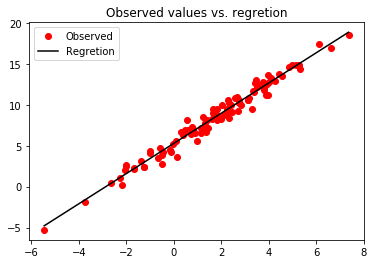

In [47]:
plt.plot(x, y_act, 'ro', label='Observed')
plt.plot(xx, yy, 'k', label='Regretion')
plt.legend(loc=0)
plt.title('Observed values vs. regretion')
plt.show()

<div class='alert alert-warning'>
  <h3>El p-valor</h3>
  <ul>
      <li>H0 : b = 0</li>
      <li>H1 : b != 0</li>
  </ul>
  <p>Si el p-valor resultante es menor que el nivel de significación, rechazamos la hipotesisi nula y aceptamos que existe una relacion lineal enre X y Y</p>
</div>